In [5]:
using Permutations, Random, Plots

In [6]:

function insert(σ::Array{Int}, θ)::Array{Int}
    n = length(σ)
    u = rand()
    if u < θ / ( θ + n )
        π = [ σ..., n + 1]
    else
        idx = rand(1:n)
        π = [ σ..., σ[idx] ]
        π[ idx ] = n + 1
    end
    π
end

function ewens(n::Int, θ)::Array{Int}
    σ = [1]
    for i in 2:n
        σ = insert(σ, θ)
    end
    σ
end

ewens (generic function with 1 method)

In [7]:
function erw_graph(p=0.7, θ=1.0, n=1000,N=100)
    σ = [ewens(N, θ), ewens(N, θ)]
    steps = ones(Bool, n)
    walk = ones(Int, n)
    is_new = zeros(Bool, N)
    steps[1] = 0
    is_new[1] = true
    count = zeros(Int, n)
    count[1]=1
    for i in 2:n 
        j = rand(1:i-1)
        steps[i] = (rand()<p ? steps[j] : ~(steps[j]))
        walk[i] = σ[1+steps[i]][walk[i-1]]
        if !is_new[walk[i]]
            is_new[walk[i]]=true
            count[i] = 1
        end
    end 
    return count
end



erw_graph (generic function with 5 methods)

In [8]:
N_trials = 10
n=10000
N = 1000
p = 0.7


0.7

In [12]:
p_list = 0.5:0.1:1.0
p_min = minimum(p_list)
p_max = maximum(p_list)

cmap = cgrad(:balance)
col(p) = cmap[(p-p_min)/(p_max - p_min)]


col (generic function with 1 method)

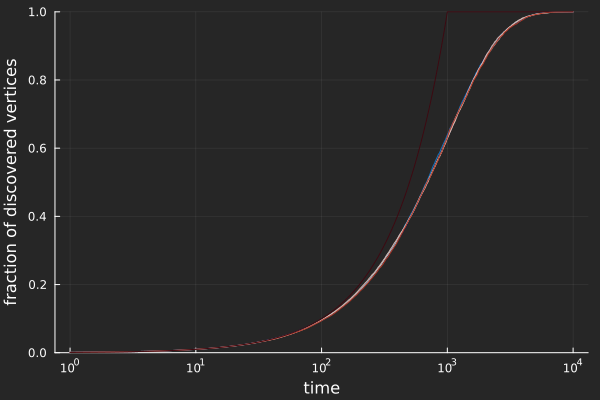

In [13]:
pl = plot(xlabel="time", ylabel="fraction of discovered vertices", xaxis=:log, background_color=:grey15, ylims=(0,1))

D = Dict()
for p in p_list 
    D[p] = zeros(n, N_trials)
    for i in 1:N_trials
        D[p][:,i] = cumsum(erw_graph(p,0.01, n,N))/N
    end
    plot!(pl, sum(D[p], dims=2)/N_trials, label=nothing, color=col(p))
end
display(pl)
